# Project Name : Sentiment Analysis form Web Scrapped Data

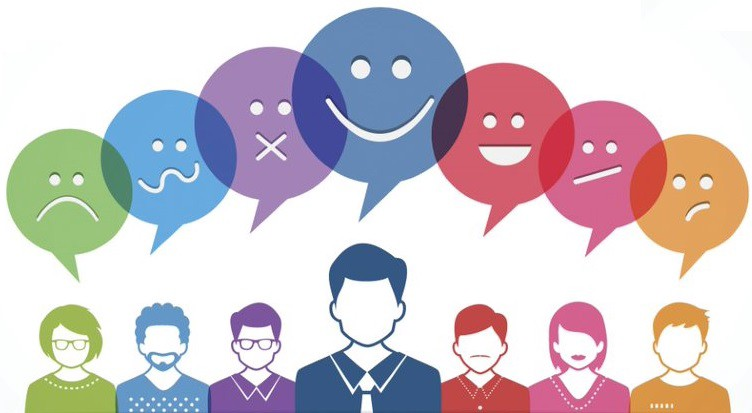

Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea.

In this project we perform will learn how to do Web Scrapping and then on that Web Scrapped data we will perform some Nautral Language Processing Techniques

### Time Line for the Project:
- Importing Libraries and Data Set
- Perfroming Web Scraping
- Data Preprocessing
- Perfroming Sentiment Analysis

#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

#### Reading our Link File

In [ ]:
links = pd.read_excel('Input.xlsx')
links.head()

Now we will scrape data from the data given in these links

In [ ]:
driver = webdriver.Chrome(ChromeDriverManager().install())

Making functions to scrape data from the links

In [ ]:
## funtion to scrape data from the links
def scrape_data(link):
    global driver
    driver.get(link)
    title=driver.find_element(By.XPATH,"//div[contains(@class,'td-post-content')]")
    driver.implicitly_wait(10)
    return title.text

In [ ]:
## function to save the scrapped files
def save_file(scrapdata):
    for data in scrapdata:
        name=str(data['URL_ID'])+".txt"
        
        f=open("./Articles/"+name,'w+',encoding='utf-8')
        f.write(data['TEXT'])
        f.close()

#### Perfroming Scraping operation 

In [ ]:
data = []

for index, row in links.iterrows():
    item={}
    item['URL_ID']=row['URL_ID']
    item['TEXT']=scrape_data(row['URL'])
    scrapdata.append(element)
save_file(data)

#### Making a data frame of scrapped data

In [ ]:
from os import listdir
path = 'files'
files = listdir(path)

In [ ]:
df = pd.DataFrame(columns=["filename","text"])

for file in files:
    f= open("./files/"+file,"r",encoding='utf-8')
    text = f.read()
    sr = int(file.replace(".0.txt",""))

    df = df.append({"File":sr,"Content":text},ignore_index=True)

In [ ]:
df = df.sort_values("File")
df
df.to_csv("content.csv",index=None)

Now we have the text, let us do some pre processing of the data before we perform sentiment analysis on it

In [ ]:
df =pd.read_csv('content.csv')
df.head()

In [ ]:
df["Number of sentences"]= df['text'].apply(lambda x: len(x.split('.')))

Replacing short form of words

In [ ]:
def short_forms():    
    return {
        "cant":"can not",
        "dont":"do not",
        "wont":"will not",
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "couldn't":"could not",
        "wouldn't":"would not",
        "shouldn't":"should not",
        "im":"i am"
        }

In [ ]:
import re  ##check if a particular string matches a given regular expression
import string

## funtion to replace the short forms 
def normalization(data):
    data = str(data).lower()
    # URL
    data = re.sub('((www.[^\s]+)|(https?://[^\s]+))',' ',data)
    data = re.sub(r'#([^\s]+)', r'\1', data)

    # Number
    data = ''.join([i for i in data if not i.isdigit()])

    # Punctuation

    for sym in string.punctuation:
        data = data.replace(sym, " ")
    short_form = short_forms()
    data = data.replace("’","'")
    words = data.split()
    converted = [short_form[word] if word in short_form else word for word in words]
    data = " ".join(converted)
    return data

In [ ]:
df

In [ ]:
df['text']=df['text'].apply(normalization)

In [ ]:
df['text'] = df['text'].apply(lambda x: x.lower())

In [ ]:
df.head()

### Performing Sentiment Analysis

First let us import a dictionary which contains the sentiment analysis words which will act as a reference for our data set words

In [ ]:
guide = pd.read_csv('LoughranMcDonald_MasterDictionary_2020.csv')
guide.head()

Assigning Positive and Negative score to our words based on the dictionary words

In [ ]:
pos = [] 
neg =[]
Uncertain = []
for index,row in guide.iterrows():
    if row['Negative']>0:
        neg.append(row['Word'].lower())
    elif row['Positive']>0:
        pos.append(row['Word'].lower())
    elif row['Uncertainty']>0:
        Uncertain.append(row['Word'].lower())

In [ ]:
df.head()

In [ ]:
def positivescore(text):
    score = 0
    global pos
    words = text.split()
    for word in words:
        if word in pos:
            score +=1
    return score
    
def negativescore(text):
    score = 0
    global neg
    words = text.split()
    for word in words:
        if word in neg:
            score +=1
    return score

In [ ]:
df['Positive Score']=df['text'].apply(getposscore)
df['Neagtive Score']=df['text'].apply(getnegscore)

In [ ]:
df.head()

Getting all the different parameters

In [ ]:
df['POLARITY SCORE']=(df['Positive Score']-df['Neagtive Score'])/ ((df['Positive Score'] + df['Neagtive Score']) + 0.000001)
df['WORD COUNT']=df['text'].apply(lambda x:len(x.split()))
df['SUBJECTIVITY SCORE']=(df['Positive Score'] + df['Neagtive Score'])/ ((df['WORD COUNT']) + 0.000001)
df['AVG SENTENCE LENGTH']=df['WORD COUNT']/df['Number of sentences']
df['AVG NUMBER OF WORDS PER SENTENCE'] = df['WORD COUNT']/df['Number of sentences']


In [ ]:
df.head()

In [ ]:
## for avg length of words
def avgwordlength(text):
    words = text.split()
    no_of_words=len(words)
    total_char=0
    for word in words:
        total_char+=len(word)
    return total_char/no_of_words

In [ ]:
## for seeing if the sentence has pronoun
def pronoun(text):
    pronouns = r"(\b(s?i|me|we|my|ours|us|I|Me|We|My|Ours|Us)\b)"
    result = 0

    matches = re.finditer(pronouns,text,re.MULTILINE)
    for nummatch,match in enumerate(matches):
        result+=1
    return result

In [ ]:
df['AVG WORD LENGTH']=df['text'].apply(avgwordlength)
df['AVG SENTENCE LENGTH']=df['WORD COUNT']/df['Number of sentences']
df['PERSONAL PRONOUNS']=df['text'].apply(pronoun)

In [ ]:
df.head()

Adding the URL so that we know that sentence is from which Link

In [ ]:
df['URL']=links['URL']
df.columns

In [ ]:
df= df[[ 'URL', 'filename', 'text', 'Number of sentences', 'POSITIVE SCORE',
       'NEGATIVE SCORE', 'POLARITY SCORE', 'WORD COUNT', 'SUBJECTIVITY SCORE',
       'AVG SENTENCE LENGTH', 'AVG NUMBER OF WORDS PER SENTENCE',
       'AVG WORD LENGTH', 'PERSONAL PRONOUNS', 'URL', 'URL_ID']]

In [ ]:
df.head()